In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import the data file by converting into DataFrame

df=pd.read_csv('fraud_loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation:
    1.there are 614 rows and 13 columns in this datasset.
    2.there are many missing values in almost all the columns,except,
    property_area,loan_status, income,education and loan_ID.
    
    

### Checking missing values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Imputing misssing value for gender
#finding most appeared value in gender

df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Gender'].fillna('Male',inplace=True)

In [9]:
#Imputing missing value for married
#finding the most appeared value

df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df['Married'].fillna('Yes',inplace=True)

In [11]:
#Imputing missing values for dependants
#finding the most appeared value

df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
df['Dependents'].fillna('0',inplace=True)

In [13]:
#Imputing missing values in self_employed
#finding the most appeared value

df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
df['Self_Employed'].fillna('No',inplace=True)

In [15]:
#Imputing missing values for loan amount
#as the data is numerical mean value is applied

df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [16]:
#Imputing missing values for loan amount term
#as the data is numerical mean value is applied

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)


In [17]:
#Imputing missing values for credit history
#mean value is applied

df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

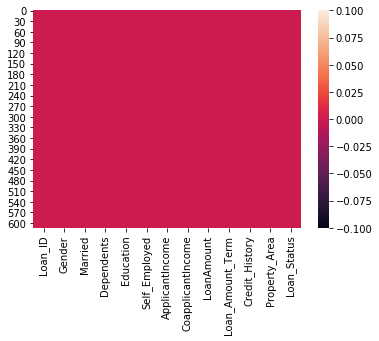

In [19]:
sns.heatmap(df.isnull())

## Statistical Summary

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observation:
    1.mean value and max value is highest in Applicant_income.
    2. 25%,50% ,75% and max all have same values in Credit_history
    3.the difference in the value of 75% and max is very high in Applicant    income,
      hence the standard deviation is also high.

In [21]:
#checking correlation

df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000


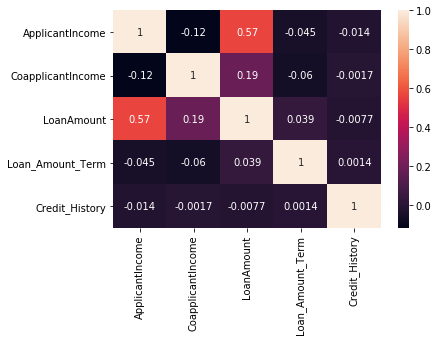

In [22]:
sns.heatmap(df.corr(),cmap='rocket',annot=True)

Findings: 1.Loan amount is negatively correlated with credit history.
    2.credit history is positively correlated with loan amount term.
    3.loan amount is positively correlated with applicant income.

## Data Visualisation

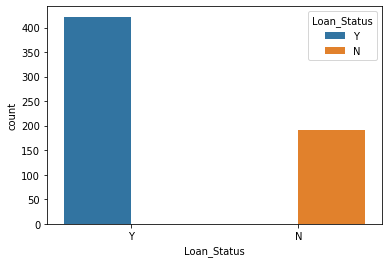

In [23]:
sns.countplot(x='Loan_Status',data=df,hue='Loan_Status')

In the above dataset the approved loan is higher than not approved loan.

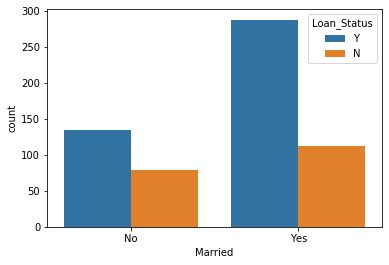

In [24]:
sns.countplot(x='Married',data=df,hue='Loan_Status')

the rate of Approval of loan for a married person is more than unmarried,

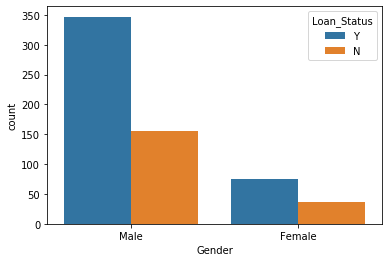

In [25]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')

Loan approved for males are higher than females.

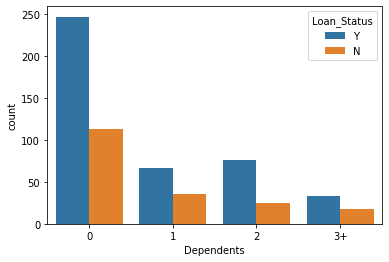

In [26]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')

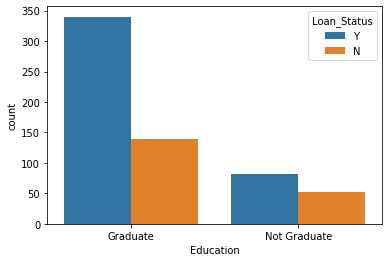

In [27]:
sns.countplot(x='Education',data=df,hue='Loan_Status')

Finding: Majority of Educated people apply for the loan and rate of approval 
    of loan for educated is more than non graduates.

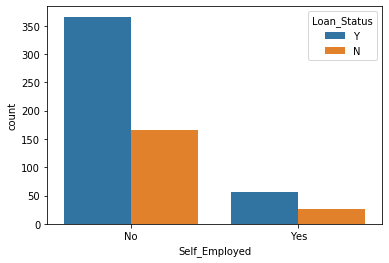

In [28]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')

Finding: in the above dataset the number of self employed people is low.
         Approval of loan for the employed person is more than the self                  employed person.
    

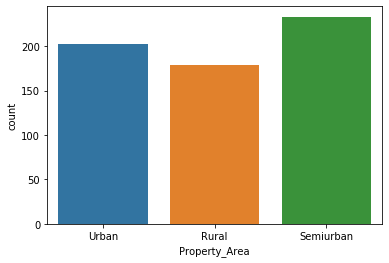

In [29]:
sns.countplot(x='Property_Area',data=df)

Observation:
    1.majority of semi urban people apply for loan.
    2.Application of loan from Rural area is minimum.
    

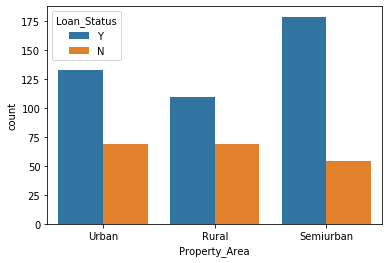

In [30]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')

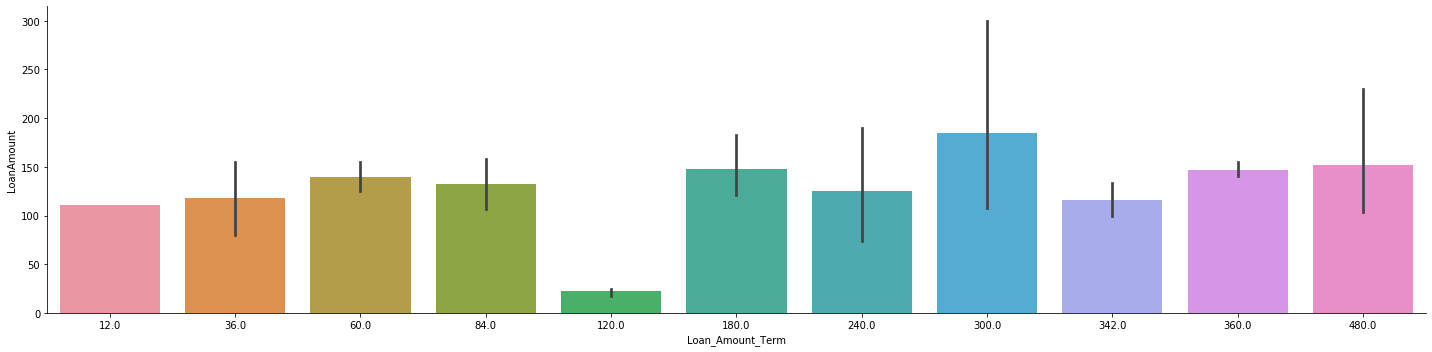

In [31]:
sns.catplot(x='Loan_Amount_Term',y='LoanAmount',data=df,kind='bar',aspect=4)
plt.show()

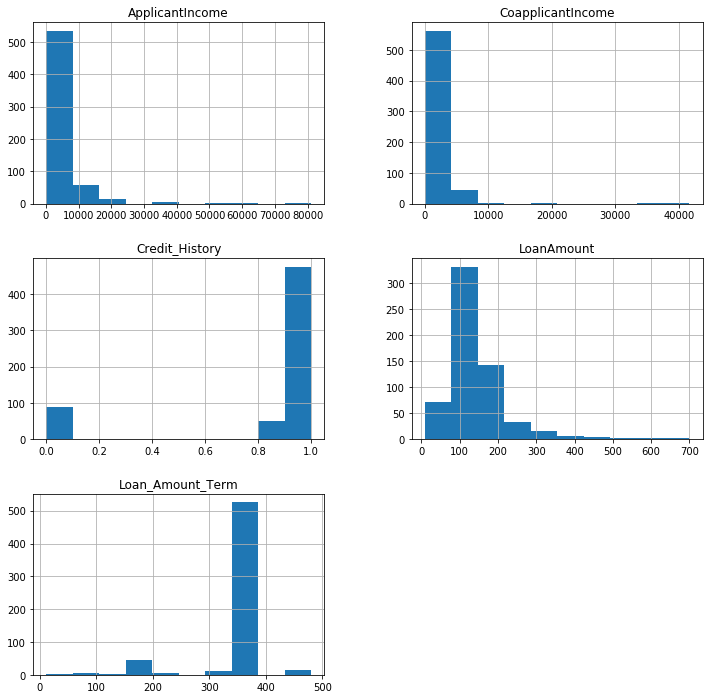

In [32]:
df.hist(figsize=(12,12))
plt.show()

Observations: Maximum applicant income less than 10000 more than 
    1000  looks like outliers and Maximum Coapplicants whose income is less 
    than 10000 looks like outliers.

In [33]:
(df['CoapplicantIncome']>10000).value_counts()

False    608
True       6
Name: CoapplicantIncome, dtype: int64

In [34]:
(df['ApplicantIncome']>10000).value_counts()

False    562
True      52
Name: ApplicantIncome, dtype: int64

In [35]:
(df['LoanAmount']>300).value_counts()

False    585
True      29
Name: LoanAmount, dtype: int64

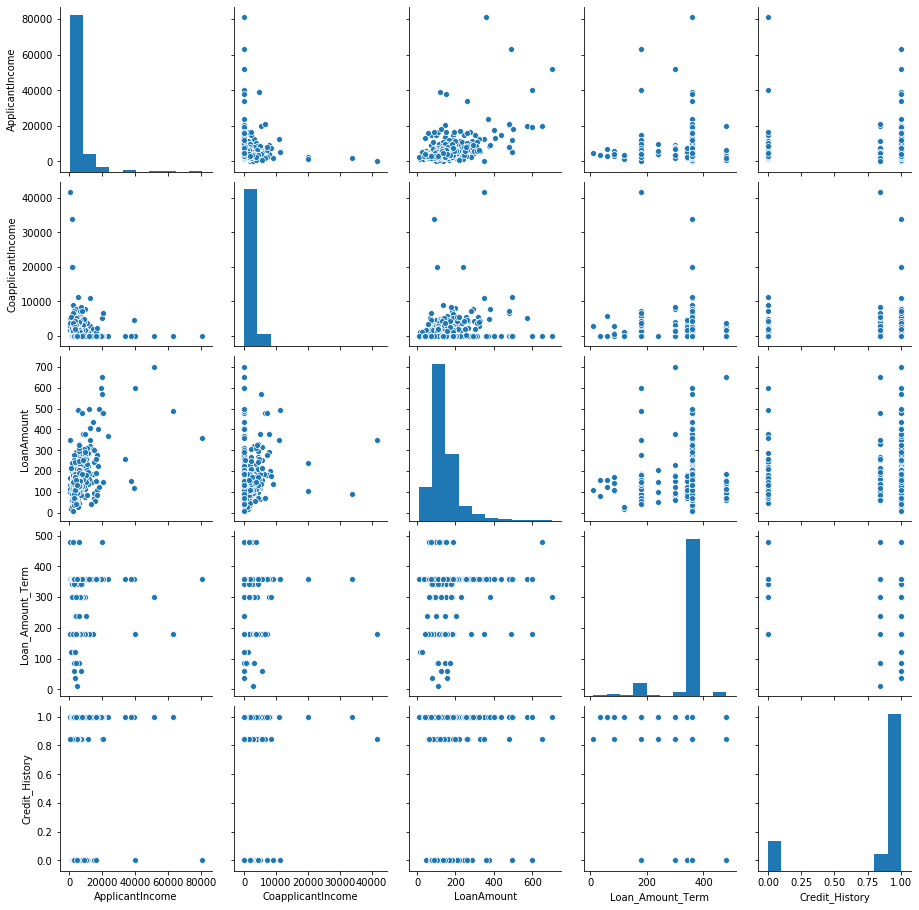

In [36]:
sns.pairplot(df)

## Check Skewness

In [37]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [38]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
        if df.skew().loc[col]<-0.55:
            df[col]=np.log1p(df[col])
            
            

In [39]:
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -4.800667
Credit_History      -1.988196
dtype: float64

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,5.888878,0.693147,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,Y


In [41]:
#Dropping the Loan_ID column as it is the unique identifier and does not
#contribute to the output

df.drop(columns=['Loan_ID'],axis=1,inplace=True)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Plotting Outliers

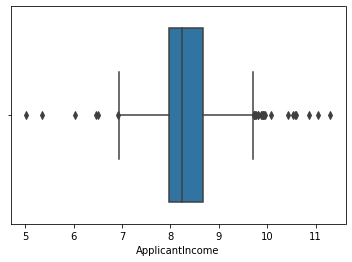

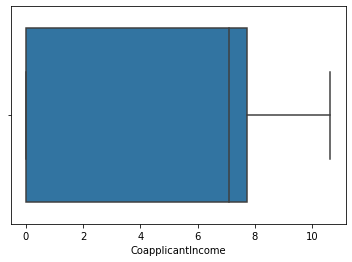

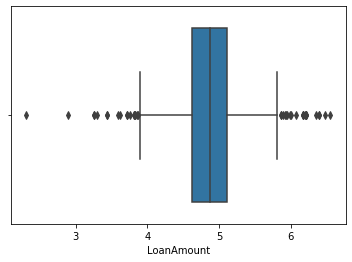

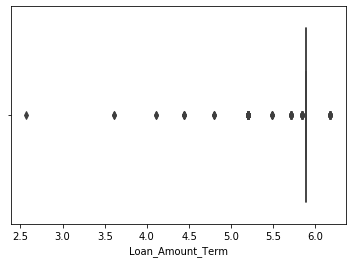

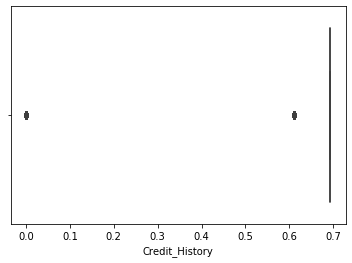

In [42]:
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()


In [43]:
#Separating the categorical data and numerical data

cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)

print('cat_df----\n',cat_df,'\nnum_df-----\n',num_df)

cat_df----
 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'] 
num_df-----
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [44]:
#Removing outliers using z score

from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[0.51618627, 1.10778298, 0.2492193 , 0.26994076, 0.44228868],
       [0.13780585, 0.78215757, 0.02252523, 0.26994076, 0.44228868],
       [0.51947937, 1.10778298, 1.35684624, 0.26994076, 0.44228868],
       ...,
       [1.01592074, 0.30848337, 1.3574234 , 0.26994076, 0.44228868],
       [0.91897195, 1.10778298, 0.74457835, 0.26994076, 0.44228868],
       [0.13780585, 1.10778298, 0.0549274 , 0.26994076, 2.41844385]])

In [45]:
threshold=3
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       555, 561, 568, 575, 585, 600], dtype=int64), array([2, 3, 3, 2, 3, 2, 2, 3, 0, 2, 0, 2, 0, 0, 0, 3, 3, 3, 0, 2, 0, 0,
       0, 3, 3, 3, 2, 2, 2, 3, 3, 0], dtype=int64))


In [46]:
df=df[(z<3).all(axis=1)]

In [47]:
df.shape

(587, 12)

## Exploring Data variables

In [48]:
#splitting x and y variables

x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']
y.replace({'N':0,'Y':1},inplace=True)

In [49]:
x=pd.get_dummies(x)
x.shape

(587, 20)

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
print(x_train.shape,x_test.shape)

(469, 20) (118, 20)


In [53]:
print(y_train.shape,y_test.shape)

(469,) (118,)


In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [57]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [58]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 11}

In [59]:
KNN=KNeighborsClassifier(n_neighbors=11)

In [64]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

criterion={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier(random_state=42)
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'gini'}

In [65]:
DTC=DecisionTreeClassifier(criterion='gini',random_state=42)

In [68]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators':range(50,100,150)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 50}

In [70]:
RFC=RandomForestClassifier(n_estimators=50,random_state=42)

In [71]:
#Gradient Boosting Classifier

GBC=GradientBoostingClassifier(n_estimators=250)

In [73]:
#ExtraTrees Classifier

ETC=ExtraTreesClassifier(n_estimators=250)
                         

In [76]:
#AdaBoost Classifier

ABC=AdaBoostClassifier(n_estimators=50)

In [75]:
#Bagging Classifier

BC=BaggingClassifier(n_estimators=250)

In [78]:
KNN=KNeighborsClassifier(n_neighbors=11)
SV=SVC(kernel='linear',C=1)
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',random_state=42)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=50,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [79]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DTC))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

***************** KNeighborsClassifier *********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')


Accuracy_score 0.6694915254237288


Cross val score= 0.7426943308007014


roc_auc_score= 0.5357142857142857


classification_report
               precision    recall  f1-score   support

           0       1.00      0.07      0.13        42
           1       0.66      1.00      0.80        76

    accuracy                           0.67       118
   macro avg       0.83      0.54      0.46       118
weighted avg       0.78      0.67      0.56       118



[[ 3 39]
 [ 0 76]]





***************** SVC *********************


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=



Accuracy_score 0.7966101694915254


Cross val score= 0.7854763296317943


roc_auc_score= 0.719611528822055


classification_report
               precision    recall  f1-score   support

           0       0.95      0.45      0.61        42
           1       0.77      0.99      0.86        76

    accuracy                           0.80       118
   macro avg       0.86      0.72      0.74       118
weighted avg       0.83      0.80      0.77       118



[[19 23]
 [ 1 75]]







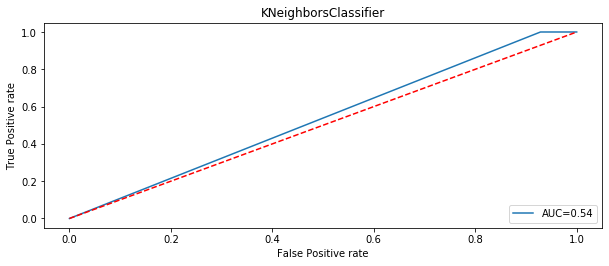

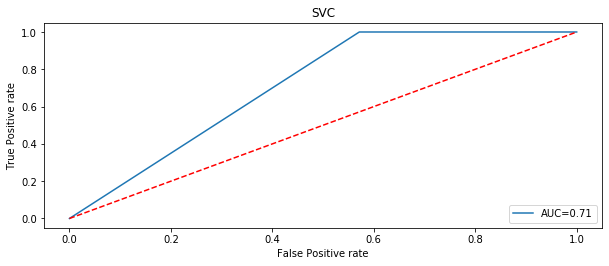

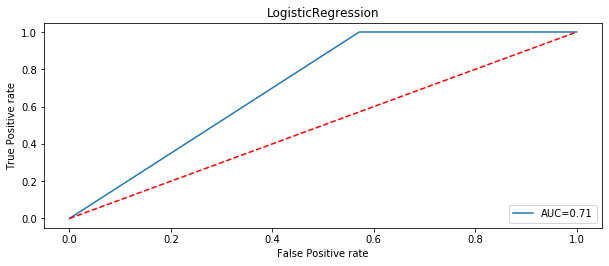

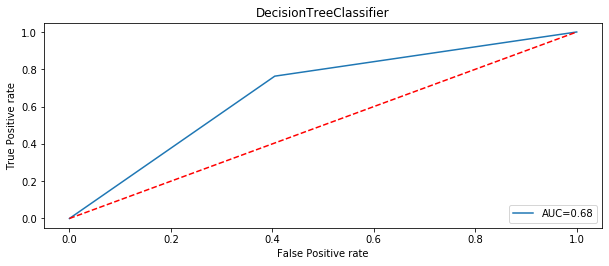

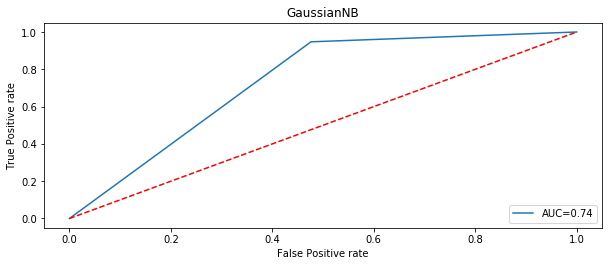

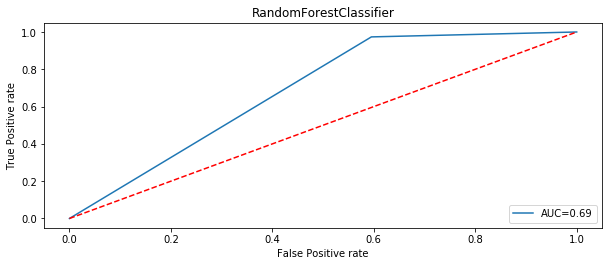

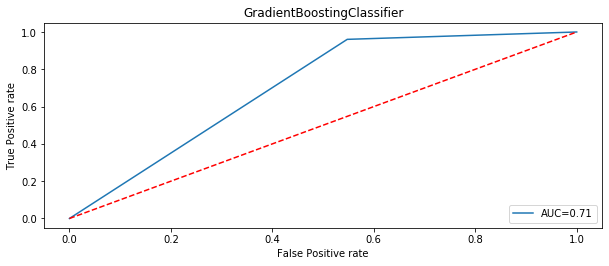

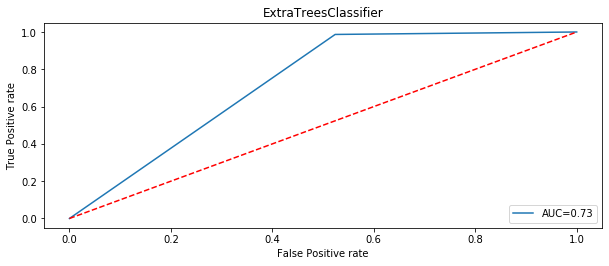

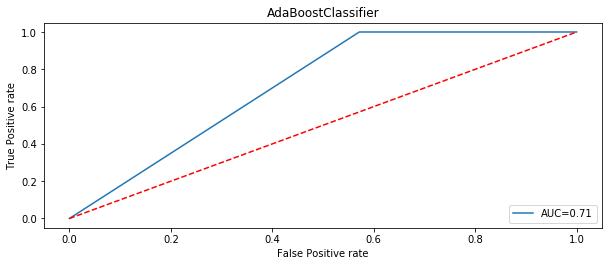

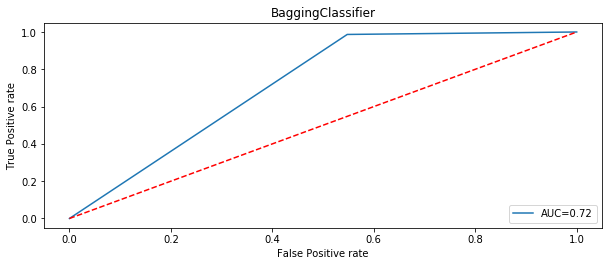

In [82]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('*****************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross val score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    print('\n\n')
    
         

In [83]:
final=pd.DataFrame({'Model':Model,'Accuracy score':score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
final
                   

,Model,Accuracy score,cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,66.949153,74.269433,53.571429
1,SVC,79.661017,81.613092,71.428571
2,LogisticRegression,79.661017,81.271186,71.428571
3,DecisionTreeClassifier,70.338983,71.218586,67.919799
4,GaussianNB,79.661017,79.053185,73.558897
5,RandomForestClassifier,77.118644,79.044418,68.922306
6,GradientBoostingClassifier,77.966102,75.295149,70.645363
7,ExtraTreesClassifier,80.508475,75.289305,73.151629
8,AdaBoostClassifier,79.661017,78.722969,71.428571
9,BaggingClassifier,79.661017,78.547633,71.961153


Observation:Extra Trees Classifier is proved to be the best model as it is 
    achieved the highest accuracy of 80%.

In [85]:
#Saving the best model

import joblib
from joblib import dump
joblib.dump(ETC,'fraud_loan_prediction.pkl')

['fraud_loan_prediction.pkl']

In [ ]:
#Saving csv file

df=pd.DataFrame(final)
df.to_csv('fraud_loan_prediction.csv')